In [35]:
#importing all necessary libraries
import string
import json
import codecs
import re
from wordcloud import WordCloud
from scipy.interpolate import make_interp_spline
import numpy as np
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from colorama import Fore, Back, Style
import pandas as pd
import matplotlib.pyplot as plt
import datetime  # Import datetime module
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
# Load the autoreload extension for Jupyter notebooks
%load_ext autoreload
%autoreload 1

# Importing RedditProcessing from the course material
%aimport ytProcessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
def vaderPrintTokens(lTokens, dSentimentScores):
    print(*lTokens, sep=', ')
    for cat, score in dSentimentScores.items(): #print each category and its score
        print(f'{cat}: {score}, ', end='')
    print()

In [38]:
def vaderSentimentAnalysis(youtubeFile, bPrint, youtubeProcessor):
    sentAnalyser = SentimentIntensityAnalyzer()
    lSentiment = []

    with open(youtubeFile, 'r') as f:
        youtubeDump = json.load(f)
        
        for video in youtubeDump:  # Looping through each video
            postText = video['title']
            postDate = video['posted_date']
            
            lTokens = youtubeProcessor.process(postText)
            dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
            lSentiment.append([pd.to_datetime(postDate), dSentimentScores['compound']])  # Fixed conversion

            if bPrint:
                vaderPrintTokens(lTokens, dSentimentScores)
                
            for comment in video['top_50_comments']:
                lTokens = youtubeProcessor.process(comment)
                dSentimentScores = sentAnalyser.polarity_scores(" ".join(lTokens))
                lSentiment.append([pd.to_datetime(postDate), dSentimentScores['compound']])

                if bPrint:
                    vaderPrintTokens(lTokens, dSentimentScores)
            
    return lSentiment


In [39]:
# Input parameters and files
posWordFile = 'positive-words.txt'
negWordFile = 'negative-words.txt'
youtubeFile = 'combined_data.json'
flagPrint = True
approach = 'vader'

In [40]:
# Import your TextProcessing class
from ytProcessing import TextProcessing

# Constructing the TextProcessing object
tweetTokenizer = TweetTokenizer()
lPunct = list(string.punctuation)
lStopwords = stopwords.words('english') + lPunct + ['rt', 'via', '...', '…', '"', "'", '']
ytProcessor = TextProcessing(tweetTokenizer, lStopwords)

# Loading positive words text file
with open(posWordFile, 'r', encoding='utf-8', errors='ignore') as fPos:
    setPosWords = set(line.strip() for line in fPos)

# Load negative words text file
with open(negWordFile, 'r', encoding='utf-8', errors='ignore') as fNeg:
    setNegWords = set(line.strip() for line in fNeg)

# Compute the sentiment
lSentiment = []
if approach == 'count':
    lSentiment = countWordSentimentAnalysis(setPosWords, setNegWords, youtubeFile, flagPrint, ytProcessor)
elif approach == 'vader':
    lSentiment = vaderSentimentAnalysis(youtubeFile, flagPrint, ytProcessor)


elon, musk, ’, robotaxi, risky, bet, tesla
neg: 0.265, neu: 0.735, pos: 0.0, compound: -0.2023, 
fraud, car, .., lol, another, enron
neg: 0.358, neu: 0.377, pos: 0.264, compound: -0.25, 
things, overlooked, tesla, need, sell, robotaxi, cybercab, first, operate, ride, hail, service, using, lease, return, vehicles, robotaxi, fleet, add, new, cybercabs, fleet, overhead, cost, tesla, per, cab, low, pay, weeks, operation, cabs, used, used, powerful, inference, computers, services, earn, money, parked, critical, tesla, ever, sell, cabs, tesla, make, billions, ride, hail, service, selling, computational, power, clients
neg: 0.113, neu: 0.799, pos: 0.088, compound: -0.128, 
lead, way, dude, need, research
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
israeli, mossas, hacks, robo, accele, disabling, break
neg: 0.341, neu: 0.659, pos: 0.0, compound: -0.4767, 
surprised, musk, prison
neg: 0.532, neu: 0.161, pos: 0.306, compound: -0.34, 
gives, ‘, rich, arrogant, ceo, overconfident, company, produ

feel, like, secluded, secretive, villages, elon, founds, expands, puts, companies, kind, tries, ignore, laws, also, pretty, much, people, like, elon, live, sound, bit, like, company's, version, cult
neg: 0.066, neu: 0.526, pos: 0.408, compound: 0.9001, 
think, acquisition, twitter, hostile, takeover, musk, acquire, twitter, without, consent, approval, board, directors, hostile, takeover, recall, awful, lot, negotiating, end, trapped, paying, wanted, instead, letting, back, buying, ownership
neg: 0.418, neu: 0.582, pos: 0.0, compound: -0.9303, 
boy, governor, screw, deal, nut, case
neg: 0.219, neu: 0.781, pos: 0.0, compound: -0.1027, 
george, bush, rules, austin
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
computing, power, elon, getting, behind, might, venturing, cryptocurrency, field, ey
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
okay, probably, also, related, fact, texas, likely, state, break, us, right
neg: 0.0, neu: 0.84, pos: 0.16, compound: 0.2263, 
ca, communist's, mess, ran

congratulations, new, inventions
neg: 0.0, neu: 0.339, pos: 0.661, compound: 0.5994, 
illusions, delusions
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
enough, lithium, enough, silicon
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ii, recently, i've, focused, role, automotive, industries, industrial, revolution, us, century, iii, i'm, already, happy, role, tesla, extension, ev, playing, restoration, us, manufacturing, renaissance, would, like, know, going, impact, states, example, concentrate, activities, one, two, states, california-texas, diversify, activities, many, us, states
neg: 0.0, neu: 0.782, pos: 0.218, compound: 0.8625, 
hi, elon, great, associate, ev, particularly, tesla, sustainability, ii, ev, use, renewable, energy, also, provide, significant, land, gains, well, that's, good, biodiversity, well
neg: 0.0, neu: 0.478, pos: 0.522, compound: 0.9382, 
well, elon, want, knock, park, right, today, look, hydro, power, low, efficiency, device, literally, pisses, available, energ

looks, like, old, recycled, footage, said, last, time, elon, bought, empty, box, filled, money, genius, hard, work, tesla, tesla
neg: 0.147, neu: 0.737, pos: 0.115, compound: 0.0772, 
engineering, emotions, 🤣, 😂, 🤣
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
load, afterwards
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
anyone, doubts, look, martin, achieved, since, founding, tesla, look, musk, achieved, that's, need, know
neg: 0.145, neu: 0.855, pos: 0.0, compound: -0.296, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
👀, g, took, without, elon, none, would, ’, happened
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, took, tesla, hell, back, model, cnbc, documentary
neg: 0.365, neu: 0.635, pos: 0.0, compound: -0.6808, 
think, need, join, big, companies, like, amazon, cosco, companies, ever, produce, auto, businesses, franchises, may, sign, contract, may, service, company, every, 

musk, hanging, owner, cnn, k, olbermann, suggested, might, get, sold, 🤔, 🤔
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
court, gave, oligarchs, free, pass, puffery, argument, musk
neg: 0.212, neu: 0.508, pos: 0.28, compound: 0.2023, 
insane, buy, politicians, rich, enough
neg: 0.29, neu: 0.323, pos: 0.387, compound: 0.2263, 
useful, idiots
neg: 0.0, neu: 0.256, pos: 0.744, compound: 0.4404, 
would, go, jail, hes, gonna, miss, big, aims, big, jail, absurd, far, 😂, 😂
neg: 0.127, neu: 0.873, pos: 0.0, compound: -0.1531, 
elon, disgusting, person
neg: 0.63, neu: 0.37, pos: 0.0, compound: -0.5267, 
last, thing, campaign, needs, musk
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
think, he's, psychopat, specific, way, dumb, af, he's, good, maybe, better, good, making, money, definitely, dumb, plays, trigger, libs, game, trump, loves, game
neg: 0.171, neu: 0.388, pos: 0.442, compound: 0.8591, 
well-off, korean, living, korea, course, interests, everyone, things, book
neg: 0.0, neu: 0.8, pos: 

phoenix, volvos, old, tech, .., nice, try
neg: 0.0, neu: 0.682, pos: 0.318, compound: 0.4215, 
“, fully, driverless, ”, cars, far, far, away, sadly, amoral, publicity, stunt, ’, seen, previous, teslas, believing, car, “, fully, driverless, ”, ’, recipe, fatal, accidents
neg: 0.417, neu: 0.583, pos: 0.0, compound: -0.8876, 
several, people, died, limit, damages
neg: 0.684, neu: 0.316, pos: 0.0, compound: -0.7579, 
dont, think, allowed, cant, even, see, back, window
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yeah, right, 😂
neg: 0.0, neu: 0.312, pos: 0.688, compound: 0.296, 
current, cars, ’, work, ’, building, 😆
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, mark, zuck, governemnt, hidden, behind, relatable, figures, aka, friendly, big, brother
neg: 0.0, neu: 0.789, pos: 0.211, compound: 0.4939, 
first, address, fact, nbc, headline, false, technology, exist, way, works, like, pieces, make, something, never, actually, putting, together, cohesive, way, secondly, new, vehicles

turn
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
у, него, болные, колени
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
technology, kills, people, laziness, advances, we'll, wait, tin, work, 😂
neg: 0.304, neu: 0.696, pos: 0.0, compound: -0.5423, 
💩, 🤢, 🤮
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
trump, elon, turn, things, public
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
except, already, told, everyone, actually, person, inside, suit
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
seriously, fundamentally, gets, rid, jobs, seriously, ridiculous, literally, tired, paying, people, companies, decided, release, already, see, people, starting, care
neg: 0.338, neu: 0.538, pos: 0.123, compound: -0.5574, 
true, right, inherency, humans, desire, enslave, cars, washing, machines, etc
neg: 0.247, neu: 0.422, pos: 0.331, compound: 0.1027, 
detroit, become, human
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, finally, revealing, new, warp, drive, starship
neg: 0.0, neu: 1.0, pos: 

greatest, person, ever, lived, hope, succeeds, least, half, plans
neg: 0.0, neu: 0.368, pos: 0.632, compound: 0.8834, 
greatest, person, ever, lived, hope, succeeds, least, half, plans
neg: 0.0, neu: 0.368, pos: 0.632, compound: 0.8834, 
good, job, elon
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 
wtf, w, x, can't, get, f-ing, block
neg: 0.413, neu: 0.326, pos: 0.261, compound: -0.3387, 
good, report, look, waymo, fully, autonomous, hundreds, manual, interventions, daily, remote, drivers, sat, offices, range, limited, hd, mapping, needs, mapping, time, intervention, data, cleansed, include, interventions, physical, driver, attend, deal, issue, please, let's, get, reporting, right, compare, say, eggs, eggs, check, data, cnbc, actually, report, narrative, reports, author, wishes, report, better, many, made, still, lacking, power, use, yes, increase, exponentially, super, computer, able, show, produce, low, cost, zero, polluting, electricity, time, fraction, time, mankind, stand, 

de, na, da
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
godsallinx
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
conhecendo, tesla, mto, bem, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
thats, absolutely, insane, man, accomplished
neg: 0.327, neu: 0.328, pos: 0.346, compound: 0.044, 
nice, work, 🔥
neg: 0.0, neu: 0.263, pos: 0.737, compound: 0.4215, 
multiple, talent, ceo
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4215, 
tour, facilities, abused, animals, get, neuralink, working
neg: 0.355, neu: 0.645, pos: 0.0, compound: -0.5106, 
sorry, guys, . ..., great, person
neg: 0.155, neu: 0.357, pos: 0.488, compound: 0.5859, 
dub, videos, hindi, please, 🇮🇳
neg: 0.0, neu: 0.635, pos: 0.365, compound: 0.3182, 
secretly, working, russians, yes, gonna, bad, us
neg: 0.312, neu: 0.446, pos: 0.241, compound: -0.2023, 
back, elon, cool
neg: 0.0, neu: 0.465, pos: 0.535, compound: 0.3182, 
🤖, 🤖, 🤖
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
xin, chào, trân, trọng, rất, cảm, ơn, chương, trình, 

wonder, optimus, integrate, tesla, technologies, like, autopilot
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
renting, optimus, could, sustainable, option, businesses, concerned, upfront, costs
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
implications, mass-producing, humanoid, robots, like, optimus, profound
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
ever, one, id, bring, star, trek, convention, meet, commander, data, meet, one
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
masses, typical, lame, boring, pop, crowd, jackasses, spoken
neg: 0.64, neu: 0.36, pos: 0.0, compound: -0.836, 
try, pass, customs, central, america, however, never, say, never, cause, several, tesla
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
robot, give, massages
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
videos, perfect, blend, education, entertainment, 🎥, 💡
neg: 0.0, neu: 0.316, pos: 0.684, compound: 0.7579, 
atlas
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
watching, engine, assembly, 

tesla, must, feeling, competition, make, move
neg: 0.0, neu: 0.769, pos: 0.231, compound: 0.128, 
would, model, year, really, one, plant, kind, expect, one, eu, one, asia
neg: 0.0, neu: 0.75, pos: 0.25, compound: 0.5667, 
hi, sam, tell, tesla, ’, discounted, australia
neg: 0.0, neu: 0.806, pos: 0.194, compound: 0.0516, 
brand, prestige, cut, dried, mercedes, benz, people, high, degree, prestige, even, though, pointed, star, adorns, buses, dump, trucks, cargo, vans, well, limousines, high, end, sports, cars
neg: 0.155, neu: 0.726, pos: 0.119, compound: -0.2732, 
usa, citizen, tesla, first, american, made, car, buy
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wow
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.5859, 
ev's, road, charging, suc's, become, time, consuming, i'm, afraid, 😮
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
monopoly, rocks, monopoly, exist
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
🤡
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
middle, income, prospective, client, n

wonder, many, people, ’, take, takes, populate, distant, planet, tesla, shareholders, suspect, leaving, us, clean, mess
neg: 0.242, neu: 0.619, pos: 0.139, compound: -0.25, 
reality, concept
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
allied, business, guy, that's, see, guys, quit, jealous
neg: 0.3, neu: 0.7, pos: 0.0, compound: -0.4588, 
jesus, christ, coming, next, years, repent, late
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
expectation, space, ship, city, video, shows, couple, hangers, car, parks
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
use, answer, like, eat, food, vegan
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
help, planet, earth, ’, respect, ’, another, vain, billionaire, one, rocket, launch, equals, pollution, billion, people, one, day, million, recalls, car, week, anybody, thinks, driving, tesla, going, fix, climate, better, check, psychiatrist, harmful, chemicals, tesla, ford, mustangs, snake, oil, salesman, way, learn, history, family, especially, fath

aluminum, batteries, known, decades, hope, breakthrough, usage
neg: 0.0, neu: 0.674, pos: 0.326, compound: 0.4404, 
learn, aluminum, battery, prone, leakage, means, discharges, even, using
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
great, robots, current, batteries, run, tesla, bot, hours, get, uobto, hours, moreand, we're, good
neg: 0.0, neu: 0.632, pos: 0.368, compound: 0.7906, 
good, job
neg: 0.0, neu: 0.256, pos: 0.744, compound: 0.4404, 
congratulations, work, keep
neg: 0.0, neu: 0.339, pos: 0.661, compound: 0.5994, 
true, kg, nail, coffin, gasoline, cars, curren, batteries, kg, electric, cars, reached, penetration, power, density, reach, batteries, weak, point, electric, cars, possible, build, commercial, electric, aircrafts, even, flying, cars, personal, robots, become, real, current, batteries, last, mins, high, energy, consumption, environments, exotic, machines
neg: 0.06, neu: 0.787, pos: 0.153, compound: 0.3612, 
recent, claims, include, significant, progress, building, b

harm, waiting, units, available, sale, comment, whether, said, true
neg: 0.263, neu: 0.526, pos: 0.211, compound: -0.1779, 
put, tariffs, cars, outside, us
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
total, freaking, bullshit, clickbait
neg: 0.767, neu: 0.233, pos: 0.0, compound: -0.765, 
think, seven, thousand, dollar, telsa, would, even, pay, materials
neg: 0.149, neu: 0.851, pos: 0.0, compound: -0.1027, 
hydrogen, fixed
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, self-destructive, visionary
neg: 0.0, neu: 0.469, pos: 0.531, compound: 0.5267, 
much, like, elon, musk, video, pointless
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
create, company, elon, musk's, rules
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
elon, musk, insights, check, 💪
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
thinking, setting, car, wrapping, companie, friend, dont, know, good, enough, market, anybody, know, something, tips, welcome, ps, netherlands
neg: 0.102, neu: 0.635, pos:

shown, disrespect, native, americans, crazy, horse, perceived, enemies, state, internet, cartoon, osama, bin, laden, blender, well, santa, claus, pedophile, teaching, children, worship, white, male, authority, figures, white, male, authority, figures, derided, faces, cherry, red, let, repent
neg: 0.226, neu: 0.621, pos: 0.153, compound: -0.6486, 
relation, story, tesla, acquiring, solar, city, tesla, need, acquire, solar, city, upsell, simply, let, customer, know, partnered, solar, city, panels, produce, electricity, tesla, cars, need, customer, wishes, continue, using, local, utility, power, cars, great, would, shareholders, solarcity, desire, car, company, solar, city's, market, cap, bill, one, day, likely, north, bill, return, times, today's, price, tesla, share, price, go, times, would, imply, market, cap, trillion, company, ever, broken, trillion, mark, bad, deal, solar, city, shareholders, bad, deal, holders, solar, city, common, stand, see, potential, gains, next, two, decades, 

succeed, good, aims
neg: 0.0, neu: 0.141, pos: 0.859, compound: 0.7269, 
good, family, background, good, memories
neg: 0.0, neu: 0.341, pos: 0.659, compound: 0.7003, 
humble, man, beautifull, soul, generousities, ❤, ❤, ❤, ️, ❤, ️, 🙏🏻, 🙏🏻, 💯, 💯
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
❤, good, luck, elon, musk's
neg: 0.0, neu: 0.253, pos: 0.747, compound: 0.7096, 
sir, elon, listening, tesla, house, building, wonderful, learning, experience, god, bless, amen
neg: 0.0, neu: 0.511, pos: 0.489, compound: 0.8225, 
sir, elon, person, like, never, insane, great, powerful, mind, else, would, much, amazing
neg: 0.254, neu: 0.361, pos: 0.386, compound: 0.4464, 
sir, elon, person, like, never, insane, great, powerful, mind, else, would, much, amazing
neg: 0.254, neu: 0.361, pos: 0.386, compound: 0.4464, 
sweet, little, boy, loves, beside, god, bless, sweetie, big, way, amen
neg: 0.0, neu: 0.292, pos: 0.708, compound: 0.9263, 
💋
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
❤
neg: 0.0, neu: 0

takeover, twitter, greatest, thing, ever, happen, social, media, platform, type, person, step, game, domain, means, electric, car, stuff, think, motive, making, video, crap, videos, matter, strictly, political
neg: 0.082, neu: 0.752, pos: 0.166, compound: 0.4019, 
talked, big, scammers, promote, big, scammers, ad, lost, trust
neg: 0.162, neu: 0.423, pos: 0.415, compound: 0.5574, 
another, egotistical, spoiled, privileged, racist, brat, typical, suspects
neg: 0.546, neu: 0.263, pos: 0.191, compound: -0.6597, 
elon, musk, says, tesla, bot, gen, optimus's, hand, tasks, money, machine
neg: 0.0, neu: 0.758, pos: 0.242, compound: 0.4939, 
one, complaint, way, picks, cylinders, loads, would, way, efficient, faster, used, hands, left, hand, placing, one, cylinder, right, hand, picking, next, that's, way, person, would
neg: 0.068, neu: 0.648, pos: 0.284, compound: 0.7906, 
’, like
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.3612, 
full, swing, wonder, many, jobs, lost, robots
neg: 0.277, neu: 0.7

model, hope, get, good, trade, price
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.7003, 
tesla, apple
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
’, teslas, varying, degrees, troublesome, quality, control, plaid, keeping, free, super-charging, ’, buy, another, tesla, better, options, musk, complete, jerk
neg: 0.22, neu: 0.541, pos: 0.239, compound: 0.128, 
fictional
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ground, clearance, fully, ladden, status
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
likely, another, elon, promise, never, delivers, musk, runs, tesla, like, ponzi, scheme, constant, promises, new, tech, lure, new, investors, pay, older, investors, waiting, returns, former, projects, ’, deliver
neg: 0.044, neu: 0.723, pos: 0.233, compound: 0.7184, 
gave, maga, musk, tax, money, get, telsa, going, .., moved, tx, cheap, labor, .., low, life, south, african, raciest, thinks, going, buy, cars, .., let, maga, people, dp, afford, .., call, people, heart, woke, .., boycott, anyth

gotta, give, ’, showing, everyone, ’, done, 👏, 👏, 👏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
detect, going, get, hit, another, vehicle
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
congratulações, husband, elon, musk, 🥰, ❤, ️, 🥰, 👏, 👏, 👏
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
wonder, consumers, react, using, robotaxi, instead, traditional, ride, service
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
idea, autonomous, vehicles, transforming, urban, mobility, excites
neg: 0.0, neu: 0.659, pos: 0.341, compound: 0.4767, 
tesla, ’, approach, ai, self-driving, sets, apart, competitors, admire, bold, strategy
neg: 0.0, neu: 0.584, pos: 0.416, compound: 0.6908, 
’, interesting, see, address, regulatory, challenges, autonomous, vehicles
neg: 0.0, neu: 0.556, pos: 0.444, compound: 0.4588, 
hope, prioritize, safety, self-driving, technology, ’, critical, aspect
neg: 0.192, neu: 0.333, pos: 0.475, compound: 0.5267, 
think, ability, operate, various, environments, significant, advantage,

mahihirapan, kayo, kung, naka, base, lang, kayo, sa, battery, .., mag, generator, kayo, .., gomawa, kayo, ng, diode, na, hundred, vols, output, kasi, wala, ng, turning, back, ang, current, mola, sa, generator, .., kasi, doon, hindi, maka, kaya, .., nag, kaka, magnet, ang, stator, tomitigas, na
neg: 0.053, neu: 0.947, pos: 0.0, compound: -0.3612, 
musk, thief
neg: 0.773, neu: 0.227, pos: 0.0, compound: -0.5267, 
ok, basta, i've, enough, repetetly, brain-washing, material, want, tesla, car, even, free
neg: 0.0, neu: 0.57, pos: 0.43, compound: 0.7003, 
great, tesla, products, impressive, wonderfully, interesting, tesla, aims, ship, roadster, cars, soon, made, tesla, car, 🎉, affordable, cheaper, people, whole, world, 🌎
neg: 0.0, neu: 0.533, pos: 0.467, compound: 0.9325, 
way, cleaner, world, make, every, manufacturer, want, cleaner, environmentally, responsible, profitable, beats, governmental, mandates, ignorant, politicians
neg: 0.095, neu: 0.455, pos: 0.45, compound: 0.7003, 
’, manufac

mask, stealit, bob, lazar, hee, liar, bob, lazar, eldervan, stealit, 🤑
neg: 0.268, neu: 0.732, pos: 0.0, compound: -0.5106, 
keeps, reaching, stars, dang, smart-elon, rocket, star, love, elon, ❣, ️, 💥, 🔥, 🚀, ♥, ️
neg: 0.0, neu: 0.538, pos: 0.462, compound: 0.7184, 
wow, amazing, elon, musk, innovations, always, unmatched, ❤, ❤
neg: 0.101, neu: 0.31, pos: 0.589, compound: 0.8074, 
done, heard, guy, built, water, run, car, oil, company, bought, killed
neg: 0.31, neu: 0.69, pos: 0.0, compound: -0.6705, 
water, engine, good, news, please, water, planet, would, abusely, used, know, important, water, functioning, life, earth, iranian, scientist, african, scientist, created, water, engine, years, ago, well
neg: 0.0, neu: 0.654, pos: 0.346, compound: 0.8442, 
❤, ❤
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
happened, elon, musk, announces, tesla, bot, optimus, next, gen, securities, durability, production
neg: 0.0, neu: 0.833, pos: 0.167, compound: 0.296, 
whole, army, robots, controlled, mu

elon, musk, goat
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, bought, website, brand, go, drain, elon, add, future, perspectives, center, square, must, find, else
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
think, takeover, shiba, china
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
question, elon, turn, twitter, app, clearly, promotes, violence, killing, children, cutting, heads, shootings, freedom, sucks
neg: 0.419, neu: 0.268, pos: 0.312, compound: -0.4939, 
cannot, comment, unable, access, x, old, conservative, veteran, patriot
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
watch, full, interview, watch, bbc, reporter, gets, humiliated
neg: 0.255, neu: 0.745, pos: 0.0, compound: -0.34, 
anytime, look, x, seems, like, something, incomplete
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.3612, 
long, americans, itchy, thumb, always, something, say, everything, twitter, wont, die
neg: 0.147, neu: 0.632, pos: 0.221, compound: 0.2607, 
hi, elon, would, consider, changing, twi

elon, musk's, twitter, takeover, full, documentary, frontline
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
love, frontline, watch, hundreds, documentaries, channel
neg: 0.0, neu: 0.543, pos: 0.457, compound: 0.6369, 
maybe, weak, people, worked, twitter, get, payback, derserve, like, position, ever, deciding, truth, need, division, country
neg: 0.14, neu: 0.628, pos: 0.232, compound: 0.2263, 
person, charge, truth, twitter, person, pro, homosexual, morality, dont, agree, left, labeled, misinformation, blocked, christian, jews, pro, homosexuals, get, decide, truth
neg: 0.24, neu: 0.59, pos: 0.17, compound: -0.2287, 
everyone, video, musk, looks, like, homosexual, bother, interview, pro, musk, supporters, angry, want, keep, crimes, femocrats, hidden
neg: 0.234, neu: 0.492, pos: 0.275, compound: 0.0, 
guaranteed, james, jacoby, biased, pro, democrat, likely, homosexual, opposite, presented, likely, truth, failure, present, sides, issue, due, political, motivation, deffinition, propaganda

guys, gay, honest, question
neg: 0.0, neu: 0.476, pos: 0.524, compound: 0.5106, 
could, combined, bedside, table, tweet, sex, ages, tweet, one, ultra, master, super, tweet
neg: 0.0, neu: 0.755, pos: 0.245, compound: 0.5994, 
capitalism, vs, communism, fight, basically, encapsulated, fight, think, life, aint, fair, want, make, fair
neg: 0.535, neu: 0.465, pos: 0.0, compound: -0.8098, 
south, african
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
happened, hype, thing, back
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
interesting, fact, elon's, father, errol, musk, married, step-daughter, children, seems, like, elon, got, weird, breeding, obsession, errol
neg: 0.184, neu: 0.583, pos: 0.233, compound: 0.2732, 
wonder, two, actually, communist, party, seem, least, familiar, marx, though, way, refer, westerners, gives, massive, maoist, vibes
neg: 0.0, neu: 0.856, pos: 0.144, compound: 0.4019, 
guys, suck
neg: 0.744, neu: 0.256, pos: 0.0, compound: -0.4404, 
billionaire, pretending, kid, onl

resume, pr, one, tenth, qualifications, needs, that's, he's, focused, people, liking, silence, people, talking, incompetence, competent, right, that's, things, work
neg: 0.123, neu: 0.595, pos: 0.283, compound: 0.5106, 
weird, people, biggest, egos, consistently, thin, skinned, ones, bigger, target, guess
neg: 0.145, neu: 0.855, pos: 0.0, compound: -0.1779, 
eggsellent, amazing
neg: 0.0, neu: 0.208, pos: 0.792, compound: 0.5859, 
okay, still, remember, daylight, gave, nightmares, tunnels, years, 😬
neg: 0.0, neu: 0.787, pos: 0.213, compound: 0.2263, 
🎵, cinco, sleep, watching, chair, helps, u, watch, ur, friends, sleeeeeeeeeeep, 🎶
neg: 0.0, neu: 0.551, pos: 0.449, compound: 0.6908, 
love, news, slug
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.6369, 
elon, musk, buys, twitter
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, owner, tesla, needs, larger, supply, service, chain, electric, vehicle, production, increase, market, share, buying, twitter, versus, buying, general, moto

elon, musk, lucky, harder, works, luckier, gets, “, surprise, surprise, ”
neg: 0.0, neu: 0.336, pos: 0.664, compound: 0.836, 
elon, musk, solves, problems, non-productive, people, cause, problems
neg: 0.432, neu: 0.4, pos: 0.168, compound: -0.5106, 
“, free, lunch, ”, bar, hawaii, phone, tablet, . ., wurking, home
neg: 0.0, neu: 0.68, pos: 0.32, compound: 0.5106, 
twit, errors, crimes, accidents, . ., paid, deliberate, violations, law, constitution
neg: 0.574, neu: 0.426, pos: 0.0, compound: -0.7964, 
shilling, bad, guys
neg: 0.636, neu: 0.364, pos: 0.0, compound: -0.5423, 
take, channel, fake, news, criticism, corporates, complaining, leaving, elon, part, one, rule, feel, threatened, hope, sheeps, asleep, wake
neg: 0.404, neu: 0.487, pos: 0.109, compound: -0.7845, 
die, ordinary, people, common, sense, want, die, globalists, k, neo-commies, nazis, dems, kill, biggest, threat, free, speech, people, able, think
neg: 0.475, neu: 0.388, pos: 0.137, compound: -0.9231, 
elon, musk, man, kan

twitter, killed, becoming, political, platform, democrats
neg: 0.474, neu: 0.526, pos: 0.0, compound: -0.6705, 
love, someone, projected, light, show, twitter, building, recently, names, lots, people, call, musk, favourite, space, karen, 😂, 😂, 😂
neg: 0.0, neu: 0.781, pos: 0.219, compound: 0.6369, 
musk, spent, billion, twitter, russia, spent, billion, military, seems, billion, dollars, unlucky, number
neg: 0.0, neu: 0.902, pos: 0.098, compound: 0.0772, 
elon, musk, authoritarian, best, fascist, worst, twitter, origins, liberal, democracy, although, change, especially, trump, republican, fascists, tried, take, musk, wants, destroy, aspects, liberal, democracy, top, political, reasons, essentially, dumb, person, believes, every, word, mouth, golden, pronouncement, unlike, hero, trumps, chancellor, germany, bought, kill, general, open, communications, device, wants, make, vehicle, hate, speech, conspiracy, theories
neg: 0.35, neu: 0.531, pos: 0.119, compound: -0.9626, 
twitter, companies,

can't, fired, anybody, would, like, possibly, can't, blow, rockets
neg: 0.0, neu: 0.563, pos: 0.437, compound: 0.6623, 
work, union, seniority, escalate, position, base, job, performer, union, like, vampires, talking, experience
neg: 0.0, neu: 0.828, pos: 0.172, compound: 0.3612, 
never, known, union, anything, support, door, ’, waste, money, ’, overall, ’, always, better, supported, employers, union
neg: 0.135, neu: 0.483, pos: 0.382, compound: 0.6249, 
unions, car, companies, horrible, work
neg: 0.467, neu: 0.533, pos: 0.0, compound: -0.5423, 
birth, unions, came, slave, style, wages, unions, like, many, groups, become, corrupt
neg: 0.0, neu: 0.815, pos: 0.185, compound: 0.3612, 
lords, peasants, already, exist, every, major, company, ffs, unions, create
neg: 0.273, neu: 0.576, pos: 0.151, compound: -0.4019, 
typical, white, male, billionaire, becomes, libertarian, maturity, year, old, boy, also, putin's, thumb, mbs's, foot
neg: 0.0, neu: 0.881, pos: 0.119, compound: 0.2263, 
goodbye

wt, ligma, johnson, prank, good, one, ahahaha
neg: 0.0, neu: 0.674, pos: 0.326, compound: 0.4404, 
money, wants, nobody, given, money, money, 😄, 😂, 😂, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
“, news, ”, sounds, like, promotion, elon, musk, done, fans, turns, promotion, masterworks
neg: 0.0, neu: 0.8, pos: 0.2, compound: 0.3612, 
well, ex, employees, ’, work, ethics, elon, musk, work, twitter
neg: 0.0, neu: 0.792, pos: 0.208, compound: 0.2732, 
ruin, company
neg: 0.792, neu: 0.208, pos: 0.0, compound: -0.5859, 
either, werent, anything, twitter, collapse
neg: 0.0, neu: 0.604, pos: 0.396, compound: 0.3875, 
dollars, avoid, bots, think, need, people, like, elon, musk
neg: 0.188, neu: 0.598, pos: 0.214, compound: 0.0772, 
fbi, way
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
amazing, tweet, worth, much, musk, biggest, investment, lost, buying, shit
neg: 0.335, neu: 0.341, pos: 0.324, compound: -0.0516, 
🏃, 🏃, 🏃, 🎨, 🎨, 🪐, 🪐, 🪐, 🚣, 🚣, 😇, 🤱, 🙏
neg: 0.0, neu: 0.0, pos: 0.0, compound: 

took, cancelled, twitter, account, missed
neg: 0.583, neu: 0.417, pos: 0.0, compound: -0.4939, 
dislike, elon, man, might, even, dislike, u, even
neg: 0.51, neu: 0.49, pos: 0.0, compound: -0.6369, 
anything, musk, fantastic, money, pit, right, leaning, dudes, nothing, like, endless, legal, problems, grift, siphoning, money, people, already, exploit
neg: 0.301, neu: 0.556, pos: 0.143, compound: -0.2453, 
part, two
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
new, subscriber, first, video, usually, click, subscribe, least, uploads, one, bravo
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
need, update
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
remember, last, several, messages, twitter, bots, spam, accounts, elon, took, control, none
neg: 0.185, neu: 0.815, pos: 0.0, compound: -0.3612, 
musk, net, worth, billions, billions, billions, dollars, eight, billion, people, blinked, went, living, lives, mote, dust, suspended, sunbeam
neg: 0.148, neu: 0.762, pos: 0.09, compound: -0.296, 
wonde

elon, musk, huge, cash, support, donald, trump, presidential, election, wins, elon, musk, effectively, become, decision, maker, trump's, government
neg: 0.0, neu: 0.547, pos: 0.453, compound: 0.891, 
nothing, manipulation, norway, know, world, american, school, system, books, correct
neg: 0.0, neu: 0.827, pos: 0.173, compound: 0.2235, 
proven, high, iq, people, problems, emotions, knows, speaking, togheter, gets, money, back, tax, payers, something, trumo, pay, taxes
neg: 0.204, neu: 0.796, pos: 0.0, compound: -0.4767, 
us, always, accused, countries, corruption, meanwhile, wealthiest, businessman, given, million, one, presidential, candidates, think, expecting, anything, return
neg: 0.108, neu: 0.735, pos: 0.157, compound: 0.25, 
zgermn, ambassador, draw, swastik, new, car, 💀
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
even, dreams, can't, revive, former
neg: 0.263, neu: 0.388, pos: 0.349, compound: 0.169, 
india, mature, n, experiences, canada, leader
neg: 0.0, neu: 0.588, pos: 0.4

trump, probably, meant, find, enough, fraudulent, democrat, votes, plenty, find, able, find, enough, prove, beyond, doubt, fraudulent, trump, would, running, president, would, wanted, supporters, find, many, fraudulent, opposition, votes, possible, nothing, wrong
neg: 0.278, neu: 0.597, pos: 0.125, compound: -0.7681, 
use, press, tv, source, that's, literally, iranian, propaganda, outlet
neg: 0.2, neu: 0.8, pos: 0.0, compound: -0.25, 
news, jokes, come, along, keep, great, work
neg: 0.0, neu: 0.45, pos: 0.55, compound: 0.7269, 
i'm, actually, really, glad, he's, announced, he's, running, might, actually, help, mitigate, amount, attacks, gets, leftist, politicians, daily, basis, oh, wait, kidding, 😂, 😂, 😂, 🤡
neg: 0.102, neu: 0.636, pos: 0.261, compound: 0.5413, 
freely, say, n-word, elon, musk, gave, n-word, pass, also, i'd, still, less, racist, former, twitter, employees, management
neg: 0.172, neu: 0.694, pos: 0.134, compound: -0.204, 
trust, fund, journalists, unhappy, musk, bought, 

@atrioc, signing, contract, skipping, due-diligence, actually, irrelevant, whole, botting, issue, terms, much, bots, users, throw, away, merger, acquisition, billion, walk, away, fee, binding, fraud, proven, twitter, infact, lot, trouble, sec, depending, issue, stockholder, disclosures, done, past, people, think, he's, deal, that's, nonsense, stated, would, deny, deal, twitter, forced, renegotiate, new, price, exceed, per, share, suggests, offer, would, closer, basically, raised, hold, point, learn, topic, strategic, said, anything, really, legal
neg: 0.181, neu: 0.769, pos: 0.05, compound: -0.8911, 
seeing, twitter, getting, destroyed, elon, getting, fucked, dilemma, century
neg: 0.608, neu: 0.392, pos: 0.0, compound: -0.8519, 
spends, part, time, attempting, buy, twitter, failing, correction, think, find, succeeded, buying, twitter, failing, buy, twitter
neg: 0.295, neu: 0.58, pos: 0.125, compound: -0.5859, 
twitter, somehow, results, financial, ruination, musk, it'll, worth
neg: 0.3

best, part, snl
neg: 0.0, neu: 0.323, pos: 0.677, compound: 0.6369, 
dementia, joe, biden, jokes, priceless
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.25, 
collin, josh, cutie, ’, jealous, scar, jo
neg: 0.316, neu: 0.421, pos: 0.263, compound: -0.128, 
.., krispy, kreme, report, 🤣, 😂, 🤣
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
gone
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
dumbell, one, 😂, 😂, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
can't, believe, people, still, approve, clown, 🤣
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
china, working, million, mail, ballots, biden
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
’, bout, time, started, making, bumbling, joe, biden, kudos, weekend, update, cold, opening, shit, impersonation, sucks, ’, funny, nothing, brave, ’, worse, think, ’, design
neg: 0.272, neu: 0.46, pos: 0.268, compound: -0.0315, 
months, later, che, realize, right, twitter, joke
neg: 0.0, neu: 0.732, pos: 0.268, compound: 0.296, 

neg: 0.0, neu: 0.0, pos: 

sold, guy, smoke, weeds, podcast, spend, money, charity, much, money, another, dumb, billionaire, free, speech, like, free, say, whatever, want, responsibilities
neg: 0.105, neu: 0.476, pos: 0.419, compound: 0.836, 
atleast, canceled, twitter, saying, like, white, men
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
everyone, conveniently, forgets, agenda, driven, freedom, censoring, former, owners, became, richer, ever
neg: 0.0, neu: 0.568, pos: 0.432, compound: 0.8225, 
twitter, yesterday, cesspool, lol
neg: 0.0, neu: 0.517, pos: 0.483, compound: 0.4215, 
nothing, stop, whats, coming, correct, :)
neg: 0.0, neu: 0.45, pos: 0.55, compound: 0.5978, 
guy, trying, sound, like, he's, got, important, things, say
neg: 0.0, neu: 0.619, pos: 0.381, compound: 0.5106, 
elon, paid, today's, rout
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
@elonmusk, needs, make, twitter, tesla, lol
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
investigate, new, shades, blue, care, anymore, keep, twit

elon, musk, killer, helping, russian, fascists, starlink
neg: 0.496, neu: 0.325, pos: 0.179, compound: -0.5994, 
yes, love, working, believe, god, worship, mental, working, love, mental, working, day, night, okay, silent
neg: 0.0, neu: 0.342, pos: 0.658, compound: 0.946, 
electric, cars, catch, fire, unexplained, accelerations, loss, braking, killer, rich, drivers, ugly, hell, .., elon, trump, clone, really, another, rich, man, spoiled, fat, kid, loves, accolades, basks, adulation, rich, fat, cat, friends, trump, building, luxury, bunkers, elon, genius, businessman, rode, backs, smarter, men, invent, space, x, tech
neg: 0.249, neu: 0.468, pos: 0.283, compound: 0.5423, 
elon, cool, dude, 👍, 👍
neg: 0.0, neu: 0.465, pos: 0.535, compound: 0.3182, 
hope, received, message
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 
great, interview
neg: 0.0, neu: 0.196, pos: 0.804, compound: 0.6249, 
ohno, musk, sucked, trump, taint, plus, election, swerving, money
neg: 0.273, neu: 0.727, pos: 0.0,

moist, critical, actually, gets, critical
neg: 0.605, neu: 0.395, pos: 0.0, compound: -0.5574, 
likes, less, k, views, 😂
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.4215, 
pussy, cencering, like, charlie, grow, balls, please
neg: 0.0, neu: 0.51, pos: 0.49, compound: 0.5859, 
elon, musk, perfect, florida, man, cant, escape, fact, born, bred, south, africa, every, second, white, male, actually, carbon, copies, florida, man
neg: 0.063, neu: 0.785, pos: 0.153, compound: 0.4909, 
i'm, sorry, anyone, drives, cyber, truck, moron
neg: 0.474, neu: 0.526, pos: 0.0, compound: -0.5423, 
amazing, compilation
neg: 0.0, neu: 0.208, pos: 0.792, compound: 0.5859, 
twitter, users, vote, oust, elon, musk, ceo, •, france, english
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
nonsense
neg: 1.0, neu: 0.0, pos: 0.0, compound: -0.4019, 
i'd, much, sooner, see, teach, new, generation, engineering, company, leaders, need, great, company, leaders, many, industries, need, social, media
neg: 0.0, neu: 0.814, pos

literally, watch, tyt, rumble, may, watch, movies, youtube, watch, many, independent, content, creators, youtube, youtube, content, generic, may, couple, podcasts, watch, however, come, back, watch, podcast, see, rumble, problem, twitter, basically, everyone, twitter, government, shill, gatekeeper, grifter, mean, ultimately, elon, needs, find, way, get, normies, back, platform, much, like, tyt, tyt, rely, shills, grifters, support, platform, come, across, people, actually, even, watched, tyt, people, know, tyt, actually, one, actually, followed, jimmy, dore, broke, away, tyt, another, mostly, dysfunctional, civilized, society, issues, ultimately, watches, family, friends, cenk's, family, funny, said, ana, kasparian, probably, muh, soulmate, reverse, psychology, leftist, seem, use, get, got, yeeting, sun, soulmate, wut, ever, mindset, drives, people, away, leftist, content, right, wing, conservative, philosophies, double, standard, liberals, use, censor, platform, thus, killing, marketa

got, banned, twitter, wishing, elon, musk, miserable, new, year, called, world's, verifiably, biggest, loser, linked, bbc, bloomberg, cnn, stories, reporting, losses, years, i'm, still, happy, last, thing, ever, posted, twitter, especially, still, true
neg: 0.262, neu: 0.553, pos: 0.185, compound: -0.5606, 
elon, musk, ffff, drugs
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
cia, aided, nazi, war, crimi, also, would, different, today, know, history, repeat, given, rise, nazi, racist, rhetoric
neg: 0.345, neu: 0.655, pos: 0.0, compound: -0.836, 
cautious, elon, went, nazi, side, hiding, joke, apart, movement, aware, man, charge, alot, companies, technology, gives, racist, hate, groups, power
neg: 0.396, neu: 0.526, pos: 0.077, compound: -0.8442, 
musk, like, edison, ford, made, fortune, people's, ideas
neg: 0.0, neu: 0.737, pos: 0.263, compound: 0.3612, 
think, isis, run, center, j, seconds, ago, think, might, hack, think, legit, sound, file, goes, plague, voice, says, like, come, fuck

ethical, capitalism, would, roughly, equivalent, less-lethal, capital, punishment, beginning, capitalist, economy, ethics, take, center, stage, along, things, innovation, competition, early, there's, room, small, capitalist, businesses, embody, ostensible, capitalist, ideals, raking, excellent, earnings, people, begin, believe, capitalism, system, gives, us, attributes, message, reiterated, people, who've, come, top, people, bottom, yet, dire, straits, they'd, doubt, early, unlikely, still, quite, possible, almost, anyone, get, ahead, pursuit, aforementioned, ideals, beneficial, society, large, however, _incidental_, eponymous, sole, concern, successful, capitalist, _capital, soon, treating, people, dignity, worrying, safety, playing, rules, non-wealthy, matter, soon, playing, fair, seems, less, profitable, _to, net, less, capital, powerful, wealthy, class, give, second, thought, ditching, rules, ethics, literally, sacrificing, poor, pursuit, _more, capital, end, capitalism, claim, ant

watch, elon, musk, pennsylvania, town, hall
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
rockets, per, day, mars, musk's, goal, six, years, that's, average, three, rockets, launching, per, day, unless, government, beaucracy, shuts, lobbying, perspective, thanks, boeing, he's, track
neg: 0.048, neu: 0.846, pos: 0.107, compound: 0.3818, 
people, struggling, inflation, crazy, billions, go, uneeded, scam, less, riable, parachute, dumb
neg: 0.599, neu: 0.401, pos: 0.0, compound: -0.8987, 
climate, change, power, evil, sonehow, let, elon, create, dangerous, cars, known, man, get, hit, tesla, dead
neg: 0.456, neu: 0.463, pos: 0.081, compound: -0.8934, 
honda, made, better, robots, nasa, made, self, propelling, rockets, honda, far, superior, electric, car, malfuction, heavy, death, machine, remotely, controlled, vaccum, tube, thought, boring, bricks, dumb, elon, controlled, opposition
neg: 0.238, neu: 0.602, pos: 0.16, compound: -0.4767, 
elon, real, tony, starks, ❤, ❤
neg: 0.0, neu: 1.0, pos

elon, musk, saved, twitter
neg: 0.0, neu: 0.517, pos: 0.483, compound: 0.4215, 
gravity, effects, everything, especially, us
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
space, x, nasa, could, discover, energy, sources, moons, along, path, mars, would, help, greatly, also
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.5859, 
mars, explorers, require, renewable, engine, energy, sources, plus, artifical, made, atmosphere, sustain, long, term, life, humans
neg: 0.0, neu: 0.877, pos: 0.123, compound: 0.2732, 
get, moon, first, first, time, real, time, even, dummies, believe, nasa, able, send, people, moon, like, going, neighborhood, store, years, ago, look, ’, even, send, rover, successfully, moon
neg: 0.0, neu: 0.814, pos: 0.186, compound: 0.6908, 
talk, nuclear, method, get, mars, acceptable, length, time, happened, warp, drive, folds, folds, space
neg: 0.0, neu: 0.85, pos: 0.15, compound: 0.3182, 
temperature, low, freezes, air, pressure, low, water, cannot, exist, liquid, air, density,

make, tesla, robots, build, city, us, test, desert, robots, build, city, desert, probably, able, build, city, mars
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
blah, blah, blah
neg: 1.0, neu: 0.0, pos: 0.0, compound: -0.296, 
elon, musk, said, alot, grand, statements, sure, hes, built, successful, car, company, think, mars, colony, highly, unlikely, musk, already, said, humans, would, already, mars
neg: 0.0, neu: 0.698, pos: 0.302, compound: 0.8442, 
yall, need, wake, man, good, antichrist, trying, break, god, firment, read, bibles
neg: 0.0, neu: 0.667, pos: 0.333, compound: 0.6124, 
elon, muski, let, shkon, zjarrin, kaleforni, let, shuke, mos, te, mirret, mu
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
insted, saving, world, figure, ruin, next, one, list
neg: 0.352, neu: 0.648, pos: 0.0, compound: -0.5859, 
humans, mars, endeavour, saving, global, economy, providing, new, gargantuan, opportunity, growth, prosperity, finding, signs, allien, life
neg: 0.0, neu: 0.722, pos: 0.278, comp

real, reason, happening, world's, elite, get, planet, live, dark, side, moon, know, something, want, raise, alarm, question
neg: 0.128, neu: 0.802, pos: 0.07, compound: -0.2732, 
people's, mental, status, problem, going, mars, alternating, crews, safe, drug, induced, sleep, would, cut, actual, mental, alert, travel, time, half, create, sleep, chambers, like, movie, alien, alternating, shifts, makes, sense, comes, month, trips, know, i'm, right, plus, crew, feel, robbed, life, quality, healthy, sleep, pattern, wonderful, mental, cushion, plus, sleep, pattern, may, norm, far, mars, provide, better, functioning, day
neg: 0.065, neu: 0.678, pos: 0.257, compound: 0.9217, 
put, second, stage, throwaway, could, get, orbit, refueling, given, fast, produce, rocket, bodies, .., kinda, makes, sense
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
genial, story, telling, got, immersed, story, completely, like, great, sci-fi, novel, except, one, real, guys, rock, tank, video
neg: 0.0, neu: 0.533, pos:

happened, elon, musk, declared, inspected, starship, booster, flight, closer
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
flight, halloween, dressed, mandalorian
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
yes
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.4019, 
flights, single, year, per, month, that's, beginning
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
flight, year
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
ok, kevin
neg: 0.0, neu: 0.312, pos: 0.688, compound: 0.296, 
🤨, world, war, breaks, plan, devil, albert, pike, freemanson, organization, years, ago, deceived, zionist, group, create, one, world, government, radioactive, materials, spread, across, europe, causing, large, population, migration, since, safe, places, earth.we, collaborat, create, matrix, move, humans, virtual, world, save, resources, using, ai, control, system, prepare, spacecraft, project, long, hibernation, humans, capsules, travel, create, new, world, distant, star, sunbathe, koh, samui, even, sleeping, cap

great, video, detail, keep
neg: 0.0, neu: 0.423, pos: 0.577, compound: 0.6249, 
include, reusable, falcon, reusable, boosters
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, destroy, earth, faster, millions, produced, launching, rocket, hopes, mars, may, know, meteorite, approaching, destroy, earth, would, explain, urgency, project, cases, lost
neg: 0.309, neu: 0.598, pos: 0.093, compound: -0.7579, 
elon, destroy, earth, faster, millions, produced, launching, rocket, hopes, mars, may, know, meteorite, approaching, destroy, earth, would, explain, urgency, project, cases, lost
neg: 0.309, neu: 0.598, pos: 0.093, compound: -0.7579, 
elon, destroy, earth, faster, millions, produced, launching, rocket, hopes, mars, may, know, meteorite, approaching, destroy, earth, would, explain, urgency, project, cases, lost
neg: 0.309, neu: 0.598, pos: 0.093, compound: -0.7579, 
watch, forgot, say, :)
neg: 0.0, neu: 0.5, pos: 0.5, compound: 0.4588, 
despite, dont, like, elon, musk, due, dumb, decisio

esa, management, ariane, espace, bosses, looking, disbelief, first, completely, amazed
neg: 0.0, neu: 0.72, pos: 0.28, compound: 0.5413, 
long, suffering, launch, pad, got, hard, poor, launchpad, seen, lot, physics, applied, xd
neg: 0.373, neu: 0.441, pos: 0.186, compound: -0.4215, 
time, rocket, reach, mars, end, world
neg: 0.0, neu: 0.82, pos: 0.18, compound: 0.0258, 
🙄, course, texas, never, repaired, running, water, infrastructure, boca, chica, hurricane, years, ago, would, expect, texas, provide, basic, infrastructure, survive, quickly, repaired, natural, disaster
neg: 0.149, neu: 0.761, pos: 0.091, compound: -0.3818, 
clever
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.4588, 
divergent, football, wailly, borrow, clam, renomegaly, discover, unlike, relieved, shingle, tested, ablaze, numeric
neg: 0.0, neu: 0.822, pos: 0.178, compound: 0.3818, 
last, question
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
technically, looks, looks, like, bob's, starship, garage, 😬
neg: 0.0, neu: 0.706, 

elon, blessed, elon, good, man, brave, american, freedom, fighter, love, trump, 😊
neg: 0.0, neu: 0.198, pos: 0.802, compound: 0.9648, 
though, new, moon, landings, get
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
waiting, list, move, mars
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
years, one, man, showed, nasa, ’, done, money, go, spend, space
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
👏, 👏, 👏, 🇺🇸, 🇺🇸, 🇺🇸, 🇺🇸, 👍
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
congratulations, mr, musk, could, get, population, believe, together, we'd, network, minds, capable, solving, rest, problems, face, 😢
neg: 0.114, neu: 0.508, pos: 0.377, compound: 0.7351, 
spacex, finally, catches, starship, booster, well, actually
neg: 0.0, neu: 0.741, pos: 0.259, compound: 0.2732, 
go, get, best-rated, weather, app, android, ios, windows, weather, never, seen, try, refly, booster, think
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hi, felix, amazing, mate, really, like, way, cutaways, excited, hands, air, 

thing, promised, take, us, nowhere, gone, nowhere, point, think, going, current, design, nightmare, logistically, mechanically, astronaut, get, anywhere, near, thing, elon, musk, creepy, weird, especially, fetish, russia, china, like, trump, saying, they're, better, well, go, live, say, see, ya, new, name, joseph, starlink, that's, new, dictator, name, 🤣
neg: 0.032, neu: 0.782, pos: 0.186, compound: 0.8074, 
somebody, actually, asked
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
heard, arguably, slightly, worse, fucking, choked, 😅
neg: 0.726, neu: 0.274, pos: 0.0, compound: -0.7867, 
first, rule, rockets, pointy, end, fiery, end, pointy, nose, ;)
neg: 0.195, neu: 0.65, pos: 0.154, compound: -0.128, 
know, gonna, spend, ton, money, redesigning, entire, ship, going, mars, future, movie, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
joke, muppets
neg: 0.0, neu: 0.312, pos: 0.688, compound: 0.296, 
course, loves, dictators
neg: 0.0, neu: 0.351, pos: 0.649, compound: 0.5719, 
putting, poi

low, earth, orbit, sounds, bad, .., would, constantly, need, monitored, .., readjusted, .., probably, need, fuel, .., even, keep, low, earth, orbit, thought, low, earth, orbit, .., impossible, keep, something, .., satilite, .., station, ect, low, earth, orbit, .., could, come, way, easier, .., understand, piece's, debris, floating, around, earth, need, scooping, .., push, towards, sun, elon, needs, give, ring, 😭, unless, thier, another, .., problem, 😕
neg: 0.194, neu: 0.769, pos: 0.037, compound: -0.8689, 
elon, refurbish, iss, .., expanding, for.furture, missions, stupid, unethical, force, iss, .., atmosphere, burn, .., burn, people, would, peeved, starts, raining, iss, pieces, .., float, dead, orbit, .., crap, even, dark, 🌑, side, moon, .., need, one, day, .., 😭
neg: 0.286, neu: 0.714, pos: 0.0, compound: -0.9274, 
looks, like
neg: 0.0, neu: 0.286, pos: 0.714, compound: 0.3612, 
mars, quintillion, minerals, elon, like, every, business, man, ..
neg: 0.0, neu: 0.762, pos: 0.238, compou

china, calls, everything, ai, give, illusion, advanced, reality, behind, india
neg: 0.0, neu: 0.818, pos: 0.182, compound: 0.25, 
flight, closer, elon, musk, said, examining, starship, booster
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
engineers, due, pay, raise
neg: 0.318, neu: 0.682, pos: 0.0, compound: -0.1027, 
starshipフラップの設計変更は必須, 。, いっそのこと, 、, フラップ固定にできないのか, ？
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boeing, blue, origin, near, spacex, done, can't, compete, receive, tax, payer, funding, nasa, reduce, size, observe, private, sector, progress, success
neg: 0.0, neu: 0.735, pos: 0.265, compound: 0.7579, 
loud, slap, heard, engines, shut, sound, every, ceo, ’, hand, slapping, foreheads, realizing, become, irrelevant
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.5859, 
go, fliht
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
magnificent, musk, spacex, rocket, space, station, industry, today, billion, gets, personalized, story, weightless, walk-up, full, tank, gas, orbit, choic

use, nuclear, energy, power, system
neg: 0.0, neu: 0.656, pos: 0.344, compound: 0.2732, 
let's, talk, imaginary, things, exist, without, talking, imaginary, things, exist, remember, seeing, mouse, running, around, side, rocket, going, fake, elon, musk
neg: 0.134, neu: 0.866, pos: 0.0, compound: -0.4767, 
brief, summed, whole, story
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
better, quiet, iss
neg: 0.0, neu: 0.408, pos: 0.592, compound: 0.4404, 
elon, musk, wants, send, people, mars, got, phallic, thing, 😂, enterprise, minimum, shuttle-plane, amalgamation, sure, first, trip, mars, might, well, earth-launched, rocket, really, anything, worth, weight, might, need, space, dock, though
neg: 0.0, neu: 0.804, pos: 0.196, compound: 0.6786, 
things, never, going, mars
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, plans, 😂, 😂, 😂
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
sharing, thoughts, 🌟, star, link, satellites, launched, path, mars, help, communication, .., maybe, solar, f

less, focus, aerodynamics, reason, dumb, rocket, ’, even, reach, moon, without, refueling, en, route, world, ’, biggest, grift, colossal, waste, time, money
neg: 0.252, neu: 0.702, pos: 0.045, compound: -0.7184, 
wait, people, think, ship, landing, ocean, part, plan, current, testing, purposes, lands, fuel, usage, consumption, lol, plan, always, land, ocean, jeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeez
neg: 0.0, neu: 0.877, pos: 0.123, compound: 0.4215, 
changing, gridfin, pattern, circular, design, would, probably, strengthen, center, portion
neg: 0.0, neu: 0.796, pos: 0.204, compound: 0.3182, 
elon, already, done, nasa, long, shot
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
called, test, article, find, things, wrong, fix, upgrade
neg: 0.307, neu: 0.693, pos: 0.0, compound: -0.4767, 
lower, fins, meter, second, burst, delay, sep, go, full, throttle
neg: 0.36, neu: 0.64, pos: 0.0, compound: -0.5423, 
win, loose
neg: 0.377, neu: 0.0, pos: 0.623, compound: 0.3612, 
spacex, building, st

elon, smoked
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
results, speaks, self, space, x, remembering, .., got, amount, dollars, boeing, got
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon's, companies, achievements, making, world, better, place, make, sure, grow, multiplanetary, species, sustaining, human, life
neg: 0.0, neu: 0.714, pos: 0.286, compound: 0.6369, 
boeing, starliner, crew, flight, test, stranded, astronauts, iss, spacex, crew, dragon, go, bring, back
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
boeing, “, safe, bet, ”, time, contracts, awarded
neg: 0.0, neu: 0.417, pos: 0.583, compound: 0.6808, 
elon, musk, greatest, african, american, ever
neg: 0.0, neu: 0.543, pos: 0.457, compound: 0.6369, 
years, later, announced, spacex, pickup, astronauts, stuck, iss, took, ride, going, boeing, starliner, maiden, manned, flight
neg: 0.118, neu: 0.882, pos: 0.0, compound: -0.25, 
spacex, rescue, boeing, starliner, stuck, international, space, station
neg: 0.177, neu: 0.531, po

elon, national, treasure, 🇺🇸
neg: 0.0, neu: 0.577, pos: 0.423, compound: 0.296, 
🙏
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
around, £, invested, tech, tsla, stocks, suggestions, additional, stocks, diversify, across, various, markets, looking, well-rounded, portfolio, balances, risk, aversion, returns, meeting, yearly, inflation, concerns
neg: 0.192, neu: 0.808, pos: 0.0, compound: -0.6124, 
think, trump, like, idea, hahaha
neg: 0.0, neu: 0.33, pos: 0.67, compound: 0.7269, 
wow, elon
neg: 0.0, neu: 0.208, pos: 0.792, compound: 0.5859, 
imagine, imagine, imagine, musk, solving, gravity, really, airplane, turn, musk, slave, basic, physics, kg, batteries, never, contain, amount, energy, kg, jet, fuel, imagine, imagine, ’, like, imagining, santa, real, nice, elon, musk, advertisement
neg: 0.048, neu: 0.746, pos: 0.205, compound: 0.7083, 
❤, ❤
neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
support, much, elon, musk's, venture, vision, future
neg: 0.0, neu: 0.515, pos: 0.485, compound: 0

video, title, hella, misleading, bro, plan, starship, land, launch, launch, land, fuel, repeat
neg: 0.2, neu: 0.8, pos: 0.0, compound: -0.4576, 
island, launch, path, possibly, land
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
build, oil, rig, type, landing, pad, shore, ’, need, expensive, special, made, ships
neg: 0.106, neu: 0.704, pos: 0.19, compound: 0.296, 
surely, landing, starship, drone, ship, pad, would, completely, throw, whole, idea, starship, window, intended, first, fully, reusable, interplanetary, rocket, hence, mechzilla, allows, rapid, turnover, flight, drone, ship, towed, back, aswell, size, starship, booster, insane, would, need, larger, pad, add, legs, needed, starship, booster, need, large, surface, land, whole, concept, ’, make, sense, would, make, sense, either, build, catch, tower, away, different, location, take, booster, orbit, first, stage, meco, occur, could, starship, de-orbit, burn, landing, burn, also, come, plethora, things, overcome, definitely, interes

want, give, away, crochet, space, x, suit
neg: 0.0, neu: 0.794, pos: 0.206, compound: 0.0772, 
interestingly, point, apple, tv, ’, mankind, space, travel, went, private, multi-billionaire, suits, less, bulky
neg: 0.0, neu: 0.816, pos: 0.184, compound: 0.4019, 
lol, choice, suits, ’, stick, one, made, nasa, individually, tailored, suits, nice, stupid, space, dangerous, redundancy, important
neg: 0.261, neu: 0.442, pos: 0.297, compound: -0.0258, 
thanks
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.4404, 
takes, nasa, years, design, zipper, years, test, work
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
one, forget, spacex, suit, anywhere, near, complete, thermal, layering, water, cooling, protection, micro-meteoroids, necessary, systems, installed, suit, bulky, rest
neg: 0.095, neu: 0.905, pos: 0.0, compound: -0.2263, 
let's, see, spacex, space, suits, work, without, umbilical, i'm, sure, miniaturize, life, support, backpack, test, mobility
neg: 0.105, neu: 0.75, pos: 0.145, compound: 0.187

spacex, car, makers, used, computer, aided, design, modeling, part, failed, they'd, re-engineer, fail
neg: 0.382, neu: 0.618, pos: 0.0, compound: -0.7783, 
rapidly, iterating, using, disposable, aspects, starship, great, thing, however, attempting, booster, catch, fifth, flight, grandstanding, risk, destroying, launch, tower, tank, farm, things, facility, rapid, decoration, showmanship, could, lead, disaster, let, ’, hope, spacex, realizes, risk, major, mess, starship, reliably, landing, target, booster, cash, order
neg: 0.251, neu: 0.627, pos: 0.122, compound: -0.7506, 
new, solution, starship's, weak, problem, launch, ducktape, ok, better, watch
neg: 0.311, neu: 0.278, pos: 0.411, compound: 0.2023, 
⁠, spacex, milks, nasa, budget, couple, billion, tax, money, go, spacex, time, blows, ’, development, moon, mars, nasa, programs, goodness, passion, space, humanity, thought, ’, hard, live, together, earth, 🌍, hard, would, moon, bad, weather, oxygen, water, food, characters, earth, think,

multiply, timelines, ’, get, accurate, timeline
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
films, apollo, lm, lander, tested, different, surfaces, contact, angles, high, probability, starship, fall, side
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
hard, part, accomplished, society, become, odd, e, uncooperative, argumentative
neg: 0.473, neu: 0.305, pos: 0.221, compound: -0.3182, 
lunar, version, starship, stage, never, going, return, earth, construct, lighter, materials, use, aluminum, carbon, fibre, instead, lunar, ship, ’, need, withstand, high, reentry, temperature, entry, temperature, moon, alternative, materials, seems, logical, mean, fewer, refills, needed, prior, heading, earth, orbit, lunar, orbit
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, spacex, defies, physics, insane, new, antigravity, aircraft
neg: 0.252, neu: 0.748, pos: 0.0, compound: -0.4019, 
🚀, thank, watching, videos, want, see, next
neg: 0.0, neu: 0.513, pos: 0.487, compound: 0.4215, 
really, be

i'd, like, seeing, musk, get, jail, time
neg: 0.0, neu: 0.706, pos: 0.294, compound: 0.3612, 
damn, torpedoes, irons, get, heavy, metal, orbit, screw, fines
neg: 0.369, neu: 0.631, pos: 0.0, compound: -0.4767, 
elon, afford, fine, launching, pre-approval, want, risk, personal, liability, something, goes, wrong, someone, gets, injured, 😊
neg: 0.445, neu: 0.413, pos: 0.142, compound: -0.765, 
faa, give, approval, give, approval, musk, simply, wait, knows, spacex, get, approval, claim, tantrum, made, approve, launch, also, surprise, launched, claiming, going, catch, land, ocean, approval
neg: 0.074, neu: 0.503, pos: 0.423, compound: 0.9042, 
elon, piece, crap, getting, deserves, spacex, needs, fire
neg: 0.455, neu: 0.545, pos: 0.0, compound: -0.6124, 
launch, pay, fine, well, proberly, less, everything, else, fined
neg: 0.124, neu: 0.531, pos: 0.345, compound: 0.3612, 
jippyyyyy, ❤
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
license, effect, allows, spacex, launch, return, first, stage,

four, attempts, first, attempt, catching, skyscraper, booster, previous, four, attempt, experiment, starship, booster, come, intact, atmosphere, re-entry, comeout, one, piece, especially, flight, data
neg: 0.0, neu: 0.924, pos: 0.076, compound: 0.2023, 
soon, huge, space, station, orbit, thus, china, russia, try, steal, space, x, tech, weaponize
neg: 0.194, neu: 0.667, pos: 0.139, compound: -0.2263, 
happened, chinese, taking, us, technology, oooh, wait, forgot, steal, people, ’, technology, yet, 🤔, 😂
neg: 0.225, neu: 0.775, pos: 0.0, compound: -0.4939, 
’, jealous, aljazeera, 😂, ’, diminish, people, ’, achievements
neg: 0.429, neu: 0.571, pos: 0.0, compound: -0.4588, 
previous, attempts, ’, great, propaganda, .., ’, even, get, simple, facts, correct
neg: 0.142, neu: 0.567, pos: 0.291, compound: 0.4767, 
reported, misinformation, definitely, fifth, attempt, .., fifth, flight, first, catching, booster
neg: 0.164, neu: 0.643, pos: 0.193, compound: 0.1027, 
im, surprised, al, jazerra, rep

disrespect, meant, mr, musk, obviously, brilliant, individual, would, possible, next, launch, occur, n, july, would, icing, proverbial, cake
neg: 0.13, neu: 0.694, pos: 0.176, compound: 0.25, 
stage, separation, problem, even, back, day, that's, dummy, loads, used, save, cost, problems, solved
neg: 0.261, neu: 0.483, pos: 0.256, compound: -0.0258, 
fail, learned, ways, work, way, succeeds, bf, can't, look, failure, look, intent, hindsight, elon, president, ..
neg: 0.156, neu: 0.58, pos: 0.263, compound: 0.3404, 
wasting, money, fun, americans, can't, give, money, homeless, people, america
neg: 0.193, neu: 0.571, pos: 0.236, compound: 0.1531, 
’, get, miles
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
i've, seen, alot, independents, slingshot, spacecraft, nasa, guy, say, elon, whatever, name, moving, fast, think, step, back, kick, guys, going, nuclear, engine, power, focus
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, musk, welkom, free, state, produce, best, helium, spacex, shut

we're, worthy, we're, worthy, elon, want, bear, children, ha, ha, ha, ha, ha, ha, um, ah, stammer, better, genius, ever, lived
neg: 0.052, neu: 0.275, pos: 0.672, compound: 0.9612, 
raptor, used, last, use, raptor, crazy, know, cape, canaveral, hq, starships, boca, r, testing, surprised, since, original, intent
neg: 0.117, neu: 0.68, pos: 0.204, compound: 0.2023, 
new
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
elon, lights, eyes, can't, see, every, reporter, elon, middle
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
need, job, mr, musk, ones, rushing, offer, sure
neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.3182, 
mr, elon, musk, hope, everything, goes
neg: 0.0, neu: 0.633, pos: 0.367, compound: 0.4404, 
i'm, thinking, boss, loss, mr, moss
neg: 0.315, neu: 0.685, pos: 0.0, compound: -0.3182, 
wickedly, good
neg: 0.517, neu: 0.0, pos: 0.483, compound: -0.0516, 
wish, wish, 🤞, something, back, blues, greys, something, else, woke, 😱, first, time, snaped, went, funky, family, 👪
neg: 0.

elon, musk, brilliant, man, also, caring, man, world, admires, elon, love, admire
neg: 0.0, neu: 0.294, pos: 0.706, compound: 0.9501, 
starship, tons, per, launch, pounds, pounds, per, kiloton, tactile, weapons, kiloton, tactile, weapons, per, offensive, per, nation, enough, eliminate, defensive, offensive, abilities, targeted, nation, first, try
neg: 0.338, neu: 0.573, pos: 0.089, compound: -0.8658, 
aare, calling, starship, nuclear, bomber
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
spacex, leadership, changed, faa, stop, delaying, starship, elon, musk
neg: 0.216, neu: 0.784, pos: 0.0, compound: -0.296, 

neg: 0.0, neu: 0.0, pos: 0.0, compound: 0.0, 
like, videos, read, caption, interested, going, videos, must, writers, expecting, hear, topic, hear, way, back, october, necessary, go, birth, someone, beginning, time, explain, topic
neg: 0.0, neu: 0.809, pos: 0.191, compound: 0.6369, 
federal, aviation, administration, regulating, aeronautics, space, travel, surely, job, belongs, nat

seem, tired, everything, alright
neg: 0.42, neu: 0.29, pos: 0.29, compound: -0.2263, 
build, many, like, can't, escape, firmament, judgement, day, terminator, tells
neg: 0.126, neu: 0.666, pos: 0.208, compound: 0.2458, 
much, oxygen, leave, earth's, atmosphere, lead, oxygen, depletion, earth, long, term
neg: 0.107, neu: 0.893, pos: 0.0, compound: -0.0516, 
would, possible, implicate, sort, magnet, like, cleep, system, remove, said, polluted, atmosphere, possibly, recycle
neg: 0.171, neu: 0.686, pos: 0.143, compound: -0.128, 
lol, scamm, people, fucking, mingle, mind
neg: 0.0, neu: 0.641, pos: 0.359, compound: 0.4215, 
sure, hope, flight, landing, successful, would, next, fly, higher, high, fly, one, know, aprox, tons, raptors, tons, thrust, say, maximum, tons, fuel, ish, high, get, many, tons, fuel, burnt, raptor, second, dim, iq, low
neg: 0.051, neu: 0.73, pos: 0.219, compound: 0.7845, 
screw, viasat
neg: 0.583, neu: 0.417, pos: 0.0, compound: -0.1027, 
spacex, pretty, much, burying, 

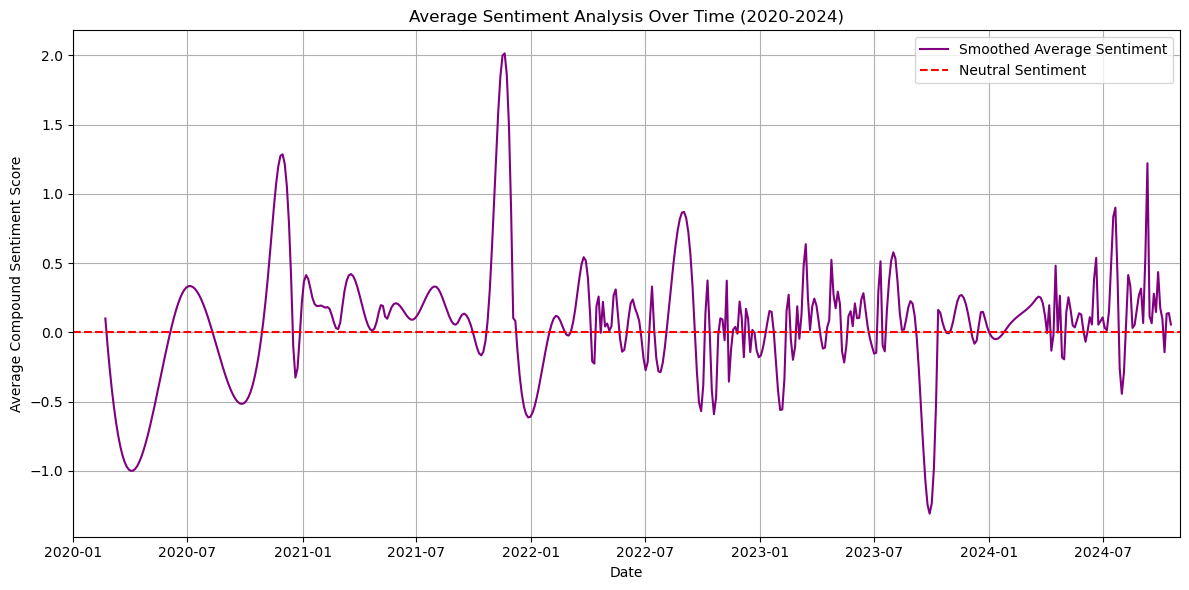

In [43]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime  # Import datetime module

# Load the JSON data from the file
with open('combined_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Check if data is a list
if isinstance(data, list):
    sentiment_analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = []

    # Process each video entry
    for entry in data:
        # Extract the posted date
        posted_date = pd.to_datetime(entry['posted_date'])

        # Analyzing the title
        title_score = sentiment_analyzer.polarity_scores(entry['title'])
        sentiment_scores.append([posted_date, title_score['compound']])

        # Analyzing the comments
        for comment in entry.get('top_50_comments', []):  # Safely get comments
            comment_score = sentiment_analyzer.polarity_scores(comment)
            sentiment_scores.append([posted_date, comment_score['compound']])

    # Convert to DataFrame
    sentiment_df = pd.DataFrame(sentiment_scores, columns=['date', 'compound'])

    # Group by date and get average sentiment
    avg_sentiment = sentiment_df.groupby(sentiment_df['date'].dt.date)['compound'].mean().reset_index()

    # Convert date for plotting
    avg_sentiment['date'] = pd.to_datetime(avg_sentiment['date'])

    # Filter data for dates between 2018 and 2025
    avg_sentiment = avg_sentiment[(avg_sentiment['date'] >= '2020-01-01') & (avg_sentiment['date'] <= '2024-10-31')]

    # Prepare data for spline
    x = avg_sentiment['date'].map(datetime.datetime.timestamp).to_numpy()  # Convert datetime to timestamps
    y = avg_sentiment['compound'].to_numpy()

    # Create spline
    x_spline = np.linspace(x.min(), x.max(), 500)  # 500 points for the smooth curve
    spline = make_interp_spline(x, y, k=3)  # Cubic spline
    y_spline = spline(x_spline)

    # Convert timestamps back to dates for plotting
    x_spline_dates = pd.to_datetime(x_spline, unit='s')

    # Plotting the spline of average sentiment over time
    plt.figure(figsize=(12, 6))
    plt.plot(x_spline_dates, y_spline, color='purple', marker='', label='Smoothed Average Sentiment')
    plt.title('Average Sentiment Analysis of YouTube Over Time (2020-2024)')
    plt.xlabel('Date')
    plt.ylabel('Average Compound Sentiment Score')
    plt.axhline(0, color='r', linestyle='--', label='Neutral Sentiment')  # Neutral line
    
    # Set x-limits as datetime objects
    plt.xlim(pd.to_datetime('2020-01-01'), pd.to_datetime('2024-10-31'))  # Limit x-axis to the specified range
    plt.xticks(rotation=0)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
else:
    print("Unexpected data format in JSON file. Expected a list of entries.")


In [ ]:
# # Function to read the JSON file
# def read_data_from_json(file_path):
#     with open(file_path, 'r') as file:
#         data = [json.loads(line) for line in file]
#     return data

# file_path = 'sentiment_output.json'
# data = read_data_from_json(file_path) 

# # Converting the data to a dataFrame
# df = pd.DataFrame(data)

# def get_sentiment_category(sentiment):
#     if sentiment['pos'] > sentiment['neg'] and sentiment['pos'] > sentiment['neu']:
#         return 'positive'
#     elif sentiment['neg'] > sentiment['pos'] and sentiment['neg'] > sentiment['neu']:
#         return 'negative'
#     else:
#         return 'neutral'

# df['sentiment'] = df['sentiment'].apply(get_sentiment_category)

# sentiment_counts = df['sentiment'].value_counts()
# print("Sentiment Counts:")
# print(sentiment_counts)

# # Function to generate word cloud of all sentiment oreintations
# def generate_word_cloud(text, title):
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.title(title)
#     plt.axis('off')
#     plt.show()
    
# # Generate word clouds for each sentiment
# for sentiment in ['positive', 'negative', 'neutral']:
#     sentiment_text = ' '.join(df[df['sentiment'] == sentiment]['text'])
#     generate_word_cloud(sentiment_text, f'{sentiment.capitalize()} Sentiment Word Cloud')